In [2]:
import pandas as pd
from collections import Counter
import re

# Load the dataset
# The file 'marathi_pos_tags_1.csv' is accessible in the environment.
try:
    df = pd.read_csv('/content/pos_marathi_dataset.csv')
    print("Dataset loaded successfully.\n")
    print("total sentences in dataset: ", df.shape[0])
    print("Initial DataFrame head:")
    display(df.head())
except FileNotFoundError:
    print("Error: 'marathi_pos_dataset_updated.csv' not found. Please ensure the file is uploaded.")
    exit()

Dataset loaded successfully.

total sentences in dataset:  10108
Initial DataFrame head:


,Original Sentence,Tokenized Sentence,POS Tags
0,धनखड यांनी राजीनामा नेमका का दिला?,धनखड यांनी राजीनामा नेमका का दिला ?,NNP PSP NN RB WQ VM SYM
1,संसदेबाहेर चर्चा,संसदेबाहेर चर्चा,RB NN
2,चंद्रशेखर बर्वेलोकमत न्यूज नेटवर्क,चंद्रशेखर बर्वेलोकमत न्यूज नेटवर्क,NNP NNP NN NN
3,नवी दिल्ली :जगदीप धनखडयांनी अचानक दिलेल्या उपर...,नवी दिल्ली : जगदीप धनखडयांनी अचानक दिलेल्या उप...,JJ NNP SYM NNP NNP RB JJ NN NN NN NN RB NN VAU...
4,संसदेच्या आवारात उपस्थित असलेला प्रत्येक व्यक्...,संसदेच्या आवारात उपस्थित असलेला प्रत्येक व्यक्...,NN NN JJ JJ QF NN PRP NNP PSP NN WQ VM DEM QC ...


In [3]:
print("\nInitial DataFrame info:")
df.info()


Initial DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Original Sentence   10108 non-null  object
 1   Tokenized Sentence  10108 non-null  object
 2   POS Tags            10108 non-null  object
dtypes: object(3)
memory usage: 237.0+ KB


In [4]:
# # --- 1. Missing Values Analysis ---
# print("\n--- Missing Values Check ---")
# missing_values = df.isnull().sum()
# print("Count of missing values in each column:")
# print(missing_values[missing_values > 0])

# if missing_values.sum() == 0:
#     print("No missing values found in the dataset.")
# else:
#     print("\nMissing values found. Removing rows with any missing values...")
#     df_before_drop = df.shape[0]
#     df.dropna(inplace=True)
#     df_after_drop = df.shape[0]
#     print(f"Removed {df_before_drop - df_after_drop} rows with missing values.")
#     print(f"DataFrame shape after dropping missing values: {df.shape}")
#     print("\nVerifying missing values after removal:")
#     print(df.isnull().sum()[df.isnull().sum() > 0]) # Should be all zeros



# --- Missing Values Analysis and Removal ---
print("--- Missing Values Check & Removal ---")

# Count missing values before removal
missing_values_before = df.isnull().sum()
print("Count of missing values in each column (before removal):")
print(missing_values_before[missing_values_before > 0])

if missing_values_before.sum() == 0:
    print("\nNo missing values found in the dataset.")
else:
    print("\nMissing values found. Removing rows with any missing values...")
    df_before_drop = df.shape[0] # Number of rows before dropping
    df.dropna(inplace=True)       # Remove rows with any missing values
    df_after_drop = df.shape[0]  # Number of rows after dropping

    print(f"Removed {df_before_drop - df_after_drop} rows with missing values.")
    print(f"DataFrame shape after dropping missing values: {df.shape}")

    # Verify missing values after removal
    print("\nVerifying missing values after removal:")
    missing_values_after = df.isnull().sum()
    if missing_values_after.sum() == 0:
        print("No missing values remaining.")
    else:
        print("Remaining missing values (should be zero):")
        print(missing_values_after[missing_values_after > 0])

# --- Final DataFrame Info ---
print("\n--- Final DataFrame Info ---")
df.info()

# To save the DataFrame after handling missing values, uncomment the line below
df.to_csv("dataframe_no_missing_values.csv", index=False)
print("\nDataFrame (with missing values removed) saved to 'dataframe_no_missing_values.csv'")

--- Missing Values Check & Removal ---
Count of missing values in each column (before removal):
Series([], dtype: int64)

No missing values found in the dataset.

--- Final DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10108 entries, 0 to 10107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Original Sentence   10108 non-null  object
 1   Tokenized Sentence  10108 non-null  object
 2   POS Tags            10108 non-null  object
dtypes: object(3)
memory usage: 237.0+ KB

DataFrame (with missing values removed) saved to 'dataframe_no_missing_values.csv'


In [5]:
# --- 2. Unique Sentences ---
print("\n--- Unique Sentences Analysis ---")
# Using 'Original Sentence' for unique sentences as it represents the full sentence.
unique_original_sentences = df['Original Sentence'].nunique()
print(f"Number of unique original sentences: {unique_original_sentences}")
print("\nExamples of unique original sentences (first 5):")
print(df['Original Sentence'].drop_duplicates().head().tolist())



--- Unique Sentences Analysis ---
Number of unique original sentences: 6916

Examples of unique original sentences (first 5):
['धनखड यांनी राजीनामा नेमका का दिला?', 'संसदेबाहेर चर्चा', 'चंद्रशेखर बर्वेलोकमत न्यूज नेटवर्क', 'नवी दिल्ली :जगदीप धनखडयांनी अचानक दिलेल्या उपराष्ट्रपतीपदाच्या राजीनाम्याची संसदेच्या आवारात दिवसभर चर्चा होती.', "संसदेच्या आवारात उपस्थित असलेला प्रत्येक व्यक्ती दुसऱ्याला धनखड यांनीराजीनामाका दिला' हा एकच प्रश्न विचारत होता."]


In [6]:
# --- 3. Unique Words and Most Frequent Words ---
print("\n--- Unique Words and Most Frequent Words Analysis ---")

# Combine all tokenized sentences into a single string, then split into words.
# Convert to lowercase for consistent word counting.
all_words = []
for sentence in df['Tokenized Sentence']:
    # Split by space and filter out empty strings that might result from multiple spaces
    words = [word.lower() for word in sentence.split(' ') if word]
    all_words.extend(words)

# The following lines for cleaning words have been removed as per your request.
# cleaned_words = [re.sub(r'[^\u0900-\u097F0-9a-zA-Z]', '', word) for word in all_words]
# cleaned_words = [word for word in cleaned_words if word]

# Now, `all_words` directly contains the words, including punctuation.
unique_words = set(all_words)
print(f"Number of unique words (case-insensitive, with punctuation): {len(unique_words)}")

# Count word frequencies
word_counts = Counter(all_words)




--- Unique Words and Most Frequent Words Analysis ---
Number of unique words (case-insensitive, with punctuation): 20362


In [7]:

# Define a specific list of Marathi stopwords as requested: pronouns, 'आहे', 'नाही'
# This list is case-insensitive for filtering.
marathi_stopwords = set([
    'मी', 'तू', 'तो', 'ती', 'ते', 'आम्ही', 'तुम्ही', 'त्यांनी', 'त्याला', 'तिला',
    'त्यांना', 'माझा', 'माझी', 'माझे', 'तुझा', 'तुझी', 'तुझे', 'त्याचा', 'त्याची',
    'त्याचे', 'तिचा', 'तिची', 'तिचे', 'आमचा', 'आमची', 'आमचे', 'तुमचा', 'तुमची',
    'तुमचे', 'त्यांचा', 'त्यांची', 'त्यांचे', 'जो', 'जी', 'जे', 'यांनी',
    'आहे', 'नाही', 'आहेत', 'नाहीत', 'होता', 'होती', 'होते', # Existing stopwords
    # New stopwords added from your list
    'आणि', 'या', 'की', 'हे', 'केले', 'केली', 'तर', 'म्हणाले', 'एक', 'केला',
    'असे', 'ही', 'सुरू', 'हा', 'यांच्या', 'करण्यात', 'काही', 'आता', 'दिली',
    'म्हटले', 'व', 'एका', 'आले', 'करत', 'झाली', 'आली', 'मात्र', 'झाले',
    'मध्ये', 'चर्चा', 'का', 'काय', 'पण', 'अशी',
    # Additional stopwords from your latest request
    'म्हणून', 'असा', 'यांना', 'दिले', 'त्यांच्या',
    # Even more stopwords from your latest request
    'तसेच', 'पाहिजे', 'अनेक', 'झालेल्या', 'अशा', 'झाला', 'दिला',
    # Latest stopwords from your request
    'असेल', 'आपल्या', 'करण्यासाठी'
])

# --- Most Frequent Words (Excluding Stopwords and Punctuation) ---
print("--- Most Frequent Words (Excluding Specific Stopwords and Punctuation) ---")

all_words = []
for sentence in df['Tokenized Sentence']:
    # Split by space and filter out empty strings
    words = [word.lower() for word in sentence.split(' ') if word]
    all_words.extend(words)

# Remove punctuation and filter out stopwords
# This regex removes anything that is not a Marathi character (Unicode range \u0900-\u097F)
# or a basic Latin letter (a-z) or a digit (0-9).
# It also handles words that might become empty after cleaning.
filtered_words = []
for word in all_words:
    # Remove punctuation
    cleaned_word = re.sub(r'[^\u0900-\u097F0-9a-zA-Z]', '', word)
    # Check if the cleaned word is not empty and not a stopword
    if cleaned_word and cleaned_word not in marathi_stopwords:
        filtered_words.append(cleaned_word)

# Count word frequencies
word_counts = Counter(filtered_words)

# Get all unique words and sort them alphabetically
unique_sorted_words = sorted(list(set(filtered_words)))
print(f"\nNumber of unique words (excluding stopwords and punctuation): {len(unique_sorted_words)}")
print("\nSorted list of unique words (first 20):")
print(unique_sorted_words[:20]) # Print first 20 for brevity

# Get the most frequent words, sorted by count in descending order
# If counts are equal, sort alphabetically by word
most_frequent_words_sorted = sorted(word_counts.items(), key=lambda item: (-item[1], item[0]))

print("\nMost frequent words (excluding stopwords and punctuation), sorted by frequency (descending):")
# Print top 50 or fewer if there aren't that many
for word, count in most_frequent_words_sorted[:50]:
    print(f"'{word}': {count}")

print("\nAnalysis complete.")

--- Most Frequent Words (Excluding Specific Stopwords and Punctuation) ---

Number of unique words (excluding stopwords and punctuation): 20101

Sorted list of unique words (first 20):
['1', '10', '108', '11', '12', '120', '14', '140', '1415', '14973', '15', '15000', '1520', '16', '17', '171', '19', '2', '2025', '202526']

Most frequent words (excluding stopwords and punctuation), sorted by frequency (descending):
'भारतीय': 250
'सांगितले': 228
'असून': 210
'जात': 208
'पंतप्रधान': 190
'होत': 184
'त्यामुळे': 182
'दाखल': 182
'माहिती': 180
'मुख्यमंत्री': 178
'काम': 176
'दोन': 173
'आला': 171
'करून': 170
'असल्याचे': 168
'लाख': 168
'कमी': 161
'कोटी': 160
'निर्णय': 158
'सर्व': 155
'ठाकरे': 151
'परंतु': 151
'दरम्यान': 149
'किंवा': 148
'त्या': 145
'भारत': 145
'राजकीय': 144
'ऑपरेशन': 142
'प्रयत्न': 142
'दोन्ही': 139
'सरकार': 137
'व्यक्त': 135
'अधिक': 132
'इतर': 132
'मोदी': 129
'येत': 129
'असलेल्या': 128
'मंत्री': 128
'रोजी': 128
'मागणी': 127
'असं': 123
'यांची': 123
'निर्माण': 120
'आज': 119
'राहुल'

In [16]:
!sudo apt install fonts-noto fonts-indic


import matplotlib.font_manager as fm

for font in sorted(fm.findSystemFonts(fontpaths=None, fontext='ttf')):
    if "devanagari" in font.lower() or "marathi" in font.lower():
        print(font)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-beng fonts-beng-extra fonts-deva fonts-deva-extra fonts-gargi
  fonts-gubbi fonts-gujr fonts-gujr-extra fonts-guru fonts-guru-extra
  fonts-kalapi fonts-knda fonts-lohit-beng-assamese fonts-lohit-beng-bengali
  fonts-lohit-deva fonts-lohit-gujr fonts-lohit-guru fonts-lohit-knda
  fonts-lohit-mlym fonts-lohit-orya fonts-lohit-taml
  fonts-lohit-taml-classical fonts-lohit-telu fonts-mlym fonts-nakula
  fonts-navilu fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra
  fonts-noto-unhinted fonts-orya fonts-orya-extra fonts-pagul fonts-sahadeva
  fonts-samyak-deva fonts-samyak-gujr fonts-samyak-mlym fonts-samyak-taml
  fonts-sarai fonts-smc fonts-smc-anjalioldlipi fonts-smc-chilanka
  fonts-smc-dyuthi fonts-smc-gayathri fonts-smc-karumbi fonts-smc-keralee

/tmp/ipython-input-2185031261.py:21: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari, Noto Sans Devanagari.
  plt.tight_layout()
/tmp/ipython-input-2185031261.py:21: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari, Noto Sans Devanagari.
  plt.tight_layout()
/tmp/ipython-input-2185031261.py:21: UserWarning: Glyph 87 (W) missing from font(s) Noto Sans Devanagari, Noto Sans Devanagari.
  plt.tight_layout()
/tmp/ipython-input-2185031261.py:21: UserWarning: Glyph 111 (o) missing from font(s) Noto Sans Devanagari, Noto Sans Devanagari.
  plt.tight_layout()
/tmp/ipython-input-2185031261.py:21: UserWarning: Glyph 114 (r) missing from font(s) Noto Sans Devanagari, Noto Sans Devanagari.
  plt.tight_layout()
/tmp/ipython-input-2185031261.py:21: UserWarning: Glyph 100 (d) missing from font(s) Noto Sans Devanagari, Noto Sans Devanagari.
  plt.tight_layout()
/tmp/ipython-input-2185031261.py:21: UserWarning: Glyph 70 (F) missing from font(s) Noto Sans Devanag

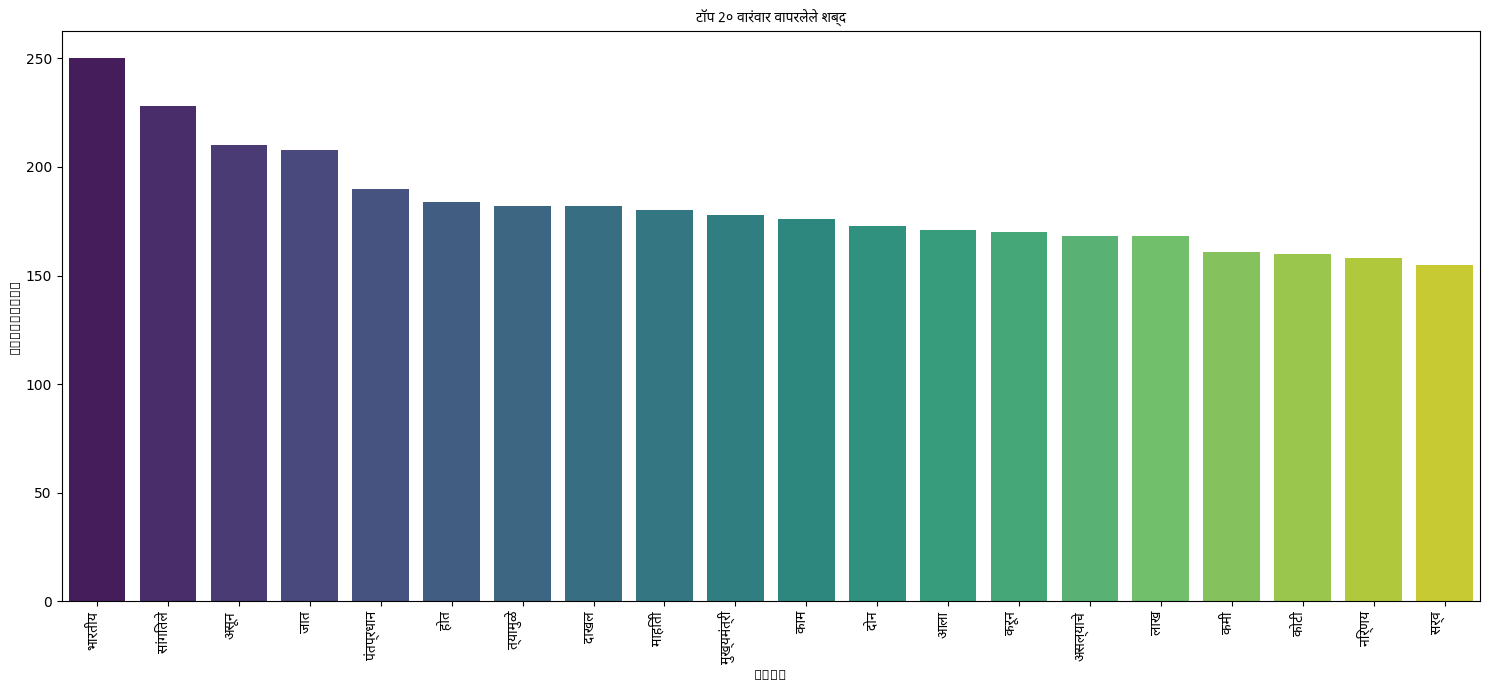

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Use a known Devanagari font (adjust path if needed)
font_path = '/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf'
devanagari_font = fm.FontProperties(fname=font_path)

# Top words and counts (assuming this is already defined)
top_words = most_frequent_words_sorted[:20]
words, counts = zip(*top_words)

# Create a bar plot with Devanagari font
plt.figure(figsize=(15, 7))
sns.barplot(x=list(words), y=list(counts), palette='viridis', hue=list(words), legend=False)

plt.title('टॉप 2० वारंवार वापरलेले शब्द', fontproperties=devanagari_font)
plt.xlabel('Word', fontproperties=devanagari_font)
plt.ylabel('Frequency', fontproperties=devanagari_font)
plt.xticks(rotation=90, ha='right', fontproperties=devanagari_font)
plt.tight_layout()
plt.show()


In [21]:
# --- 4. POS Tag Distribution ---
print("\n--- POS Tag Distribution Analysis ---")

# Combine all POS tags from the 'POS Tags' column into a single list
all_pos_tags = []
for tags in df['POS Tags']:
    # Split the string of tags by space and extend the list
    all_pos_tags.extend(tags.split(' '))

# Count the frequency of each POS tag
pos_tag_counts = Counter(all_pos_tags)

print(f"Total number of POS tags analyzed: {len(all_pos_tags)}")
print(f"Number of unique POS tags: {len(pos_tag_counts)}")

# Get the most common POS tags
most_common_pos_tags = pos_tag_counts.most_common(50) # Display top 20 for brevity

print("\nMost common POS tags:")
for tag, count in most_common_pos_tags:
    print(f"'{tag}': {count}")


--- POS Tag Distribution Analysis ---
Total number of POS tags analyzed: 146630
Number of unique POS tags: 122

Most common POS tags:
'NN': 44584
'NNP': 12945
'SYM': 11968
'VM': 11334
'JJ': 10950
'VAUX': 8017
'PUNCT': 4933
'RB': 4748
'CC': 4641
'DEM': 4539
'PSP': 4145
'PRP': 3907
'QC': 3387
'VB': 2598
'ADJ': 2133
'ADV': 1725
'AUX': 1154
'VRB': 1106
'QF': 1006
'NEG': 922
'NUM': 888
'UNK': 880
'RP': 561
'WQ': 527
'VBN': 352
'VBI': 240
'CONJ': 240
'POST': 191
'PRON': 187
'V': 183
'DET': 171
'GEN': 138
'VBD': 123
'CD': 122
'INF': 98
'ADP': 97
'VBG': 94
'VBP': 93
'PP': 70
'INTF': 50
'PREP': 39
'PRF': 39
'PR': 38
'': 35
'PRP$': 33
'VBF': 29
'QO': 26
'COMP': 25
'VA': 24
'VG': 22


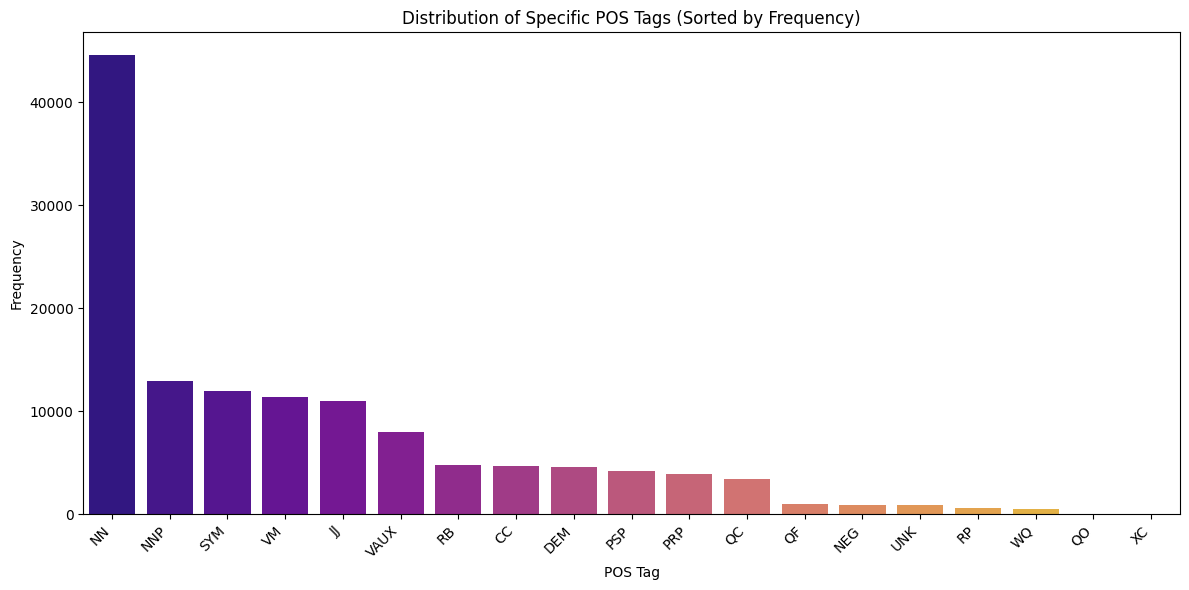

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Define the specific POS tags the user is interested in
specific_pos_tags = [
    'NN', 'NNP', 'PRP', 'DEM', 'VM', 'VAUX', 'JJ', 'RB', 'PSP', 'RP',
    'QF', 'QC', 'CC', 'WQ', 'QO', 'NEG', 'SYM', 'XC', 'UNK'
]

# Filter the pos_tag_counts to include only the specific tags
filtered_pos_tag_counts = {tag: pos_tag_counts.get(tag, 0) for tag in specific_pos_tags}

# Sort the filtered tags by frequency in descending order
sorted_tags = sorted(filtered_pos_tag_counts.items(), key=lambda item: item[1], reverse=True)
tags, counts = zip(*sorted_tags)

# Configure matplotlib to use a font that supports Devanagari characters
# Check available fonts using: print(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))
plt.rcParams['font.family'] = ['Lohit Marathi', 'sans-serif'] # Still trying Lohit Marathi, can change if needed

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(tags), y=list(counts), palette='plasma', hue=list(tags), legend=False) # Changed palette to 'plasma'

plt.title('Distribution of Specific POS Tags (Sorted by Frequency)')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()